# Laboratorio - Transmisión digital de señales analógicas.

**Universidad Nacional de Colombia**

---

## Teoría de la Información y Sistemas de Comunicaciones

**Integrantes:**
- Gabriel Andres Anzola Tachak - *ganzola@unal.edu.co*
- Juan Manuel Perez Ordoñez - *juperezor@unal.edu.co*
- Sebastian Camilo Casas Rojas - *scasasr@unal.edu.co*

1. ***PCM uniforme.*** Desarrolle un programa que para una señal de mensaje $𝑚(𝑡)$ consistente en una sinusoide o suma de sinusoides, realice el proceso de modulación y demodulación PCM con cuantización uniforme:
    - a. Muestreo, aplicando el teorema del muestreo $(𝑓_𝑠≥2𝑓_𝑀)$.
    - b. Cuantización, utilizando cuantización uniforme.
    - c. Codificación.
    - d. Generación de formatos de señalización, graficando las formas de onda de pulsos correspondientes a cualquiera de los siguientes formatos de señalización:
        - Unipolar NRZ.
        - Bipolar NRZ.
        - Unipolar RZ.
        - Bipolar RZ.
        - AMI RZ.
        - Manchester.
    - e. Para recuperar la señal $𝑚(𝑡)$ en el extremo receptor (demodulador), utilice la ec. (5.2).

### Instalación de librerías

In [26]:
%pip install numpy matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

Note: you may need to restart the kernel to use updated packages.


### Creación de la señal $m(t)$

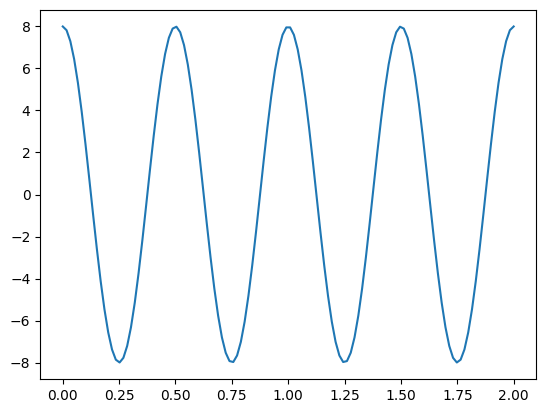

In [27]:
# create the signal with their basic properties like amplitude, frequency and time
'''
A - Amplitude of the signal
f - Frequency of the signal
t - Time variable of the signal
T - Time period of the signal
'''
A = 8                           
f = 2
T = 1 / f
t = np.linspace(0, 2.0, 120)
x = A * np.cos(2.0 * np.pi * f * t)
plt.plot(t, x)
plt.show()

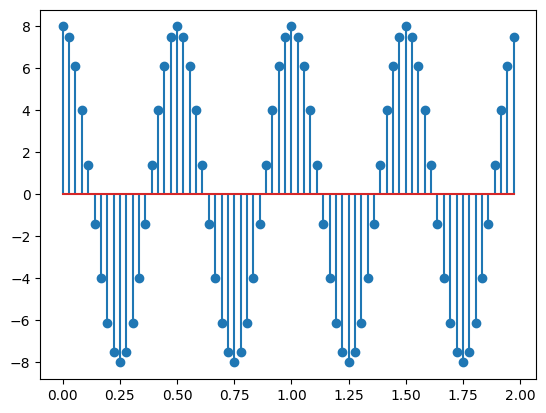

In [28]:
'''

n = number_of_sample_per_interval
fs = sampling rate
ts = sampling interval

'''

n = 18
fs = n * f
ts=np.arange(0, 2, 1 / fs)
xs=A*np.cos(2*np.pi*f*ts);

# xs Sampled signal 
plt.stem(ts, xs)
plt.show()

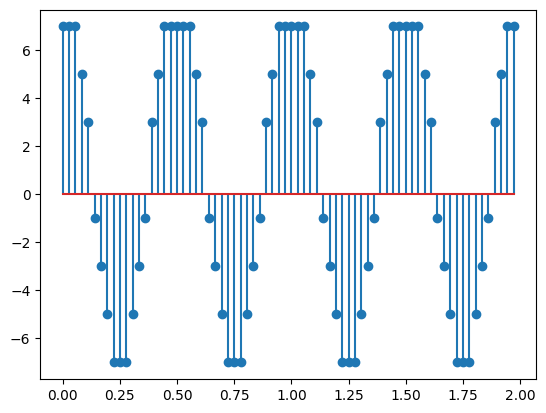

In [29]:

'''

b_bit = b-bit quantizer, number of bits required to encode each quantization level. 
L = uniformly spaced quantization levels
partition = level are between vmin and vmax with difference of delta
codebook = decrease the partition by half of delta
xq = quantized signal
encode = assigned codec

'''
b_bit = 3
L = 2 ** b_bit
vmax=A;
vmin=-vmax;
delta=(vmax-vmin)/L;
partition = np.arange(vmin, vmax, delta)
codebook= np.arange(vmin-(delta/2),vmax+(delta/2), delta) 

xq = np.copy(xs)
encode = np.copy(xs)

for i in range(len(partition)):
  left = codebook[i]
  right = codebook[i + 1]
  for j in range(len(xs)):
    # left <= xs[i] < right
    if(i != len(partition) - 1 and left <= xs[j] and xs[j] < right):
      xq[j] = partition[i]
      encode[j] = i
    # left <= xs[i], only for last portion
    if(i == len(partition) - 1 and left <= xs[j]):
      xq[j] = partition[i]
      encode[j] = i

for i in range(len(xq)):
    xq[i] = xq[i] + (delta / 2) 

plt.stem(ts, xq)
plt.show()


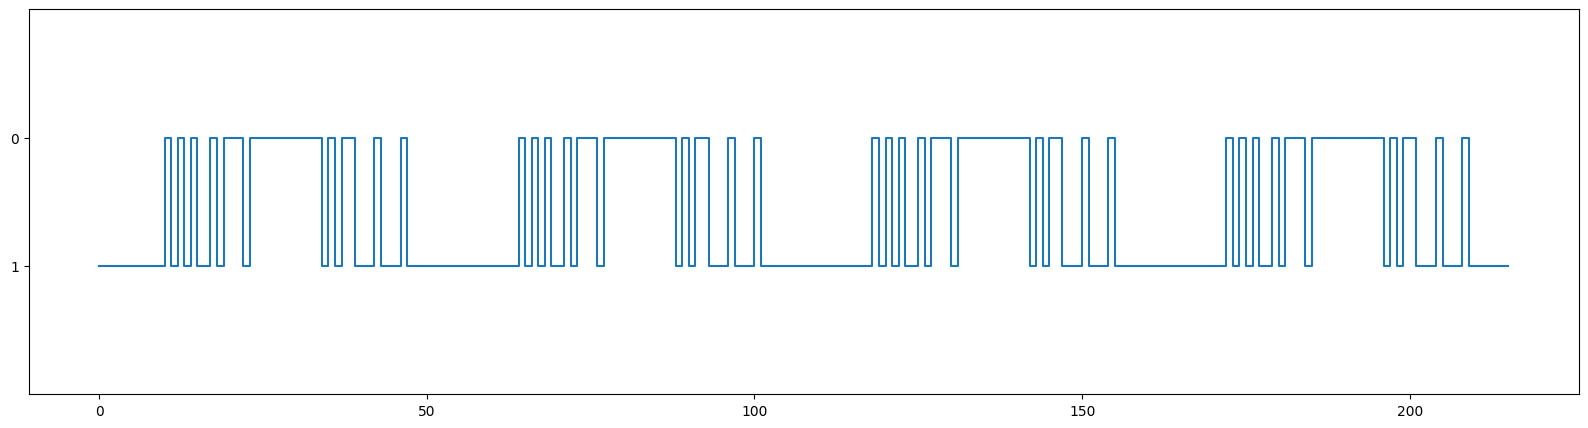

In [30]:
def decimalToBinary(val, bit):
    binary = "{0:b}".format(int(val))
    if(len(binary) > bit):
      return binary
    extra_zero = bit - len(binary)
    return extra_zero * "0" + binary

binary_codec = []
for i in range(len(encode)):
  binary = decimalToBinary(encode[i], b_bit)
  for j in range(len(binary)):
    binary_codec.append(binary[j])

pos = np.arange(len(binary_codec))
plt.figure(figsize=(20, 5))
plt.ylim(-1, 2)
plt.step(pos, binary_codec)
plt.show()